# Исследование объявлений о продаже квартир

Данные содержат архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Общая информация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://.../.../real_estate_data.csv', sep='\t')

In [3]:
# общая информация о массиве данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# посмотрим на первые строки в массиве данных
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Загрузив данные и изучив общую информацию, можно заметить следующее:
- Общее количество наблюдений: 23699
- Есть пропуски в данных в 14 из 22 столбцах


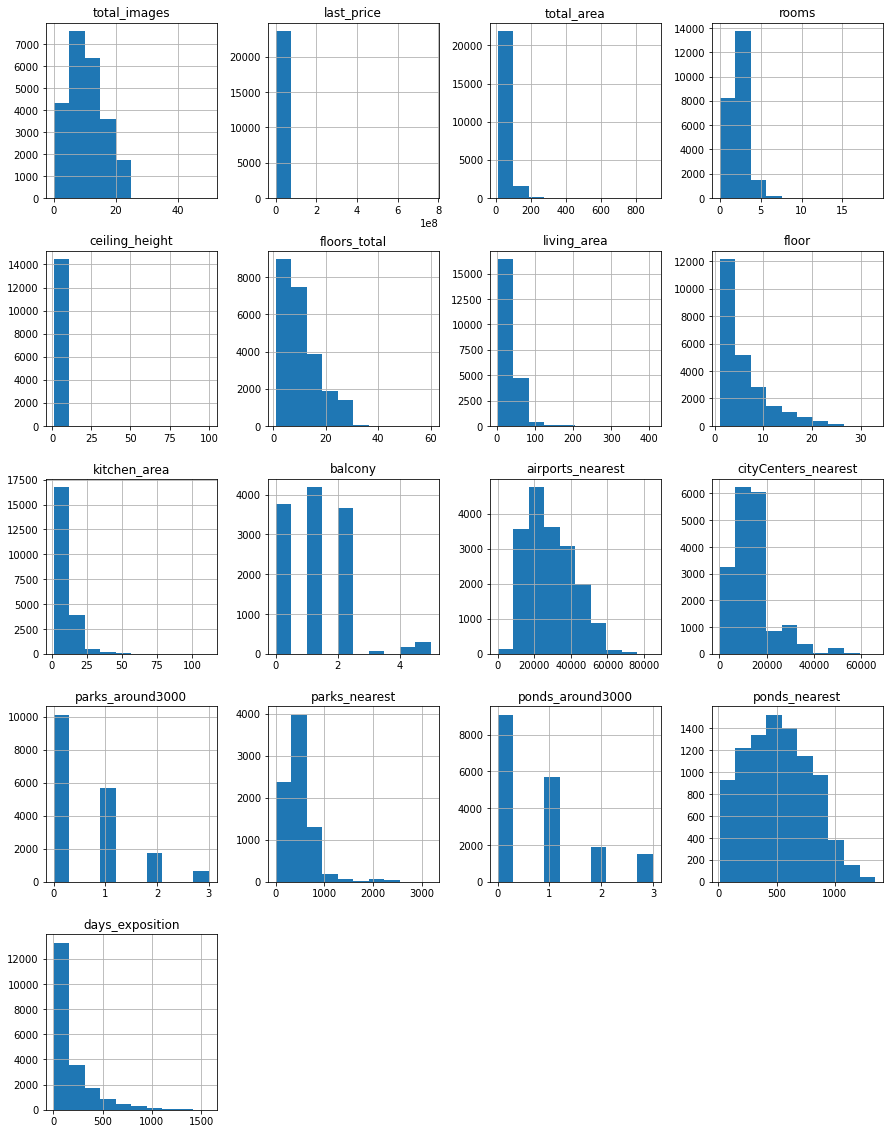

In [5]:
data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных

### Обработка пропущенных значений, типов данных столбцов и неявных дубликатов

In [6]:
# Посмотрим на количество пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрев на количество пропусков в каждом из столбцов, можно увидеть следующее:
- В столбцах floors_total и locality_name незначительное количество пропусков относительно общего количества наблюдений. Скорее всего люди сами не предоставили эти данные при размещении объявления. Пропуски в locality_name можно заменить на "не указано". Пропуски в столбце floors_total можно оставить.
- В столбцах ceiling_height пропущенные данные появились в следствие человеческого фактора. Пропуски в этом столбце можно заменить на медианные значения.
- В столбцах parks_around3000, ponds_around3000 данные заполнялись автоматически. Пропуски в этих столбцах можно оставить, т.к. скорее всего они значат отсутствие парков/водоемов в радиусе 3км.
- В столбцах parks_nearest, ponds_nearest пропуски могутбыть связаны с нулевыми значениями в parks_around3000, ponds_around3000.
- В столбце balcony пропуски могут означать отсутствие балконов, значит их можно заменить на 0.
- В столбце airports_nearest, cityCenters_nearest пропуски могли возникнуть из-за технической ошибки, можно заменить медианным значением.
- В столбце days_exposition значения заполнялись автоматически. Пропуски значат, что объявление еще активно.
- В столбце is_apartment наибольшее количество пропусков, значения в столбце типа bool. Пропуски можно заменить на False, т.к. столбец заполнялся вручную и не заполнлся, если объявления не по аппартаментам.

In [7]:
# Замена пропущенных значений в ceiling_height
median_for_na = ['ceiling_height']
for x in median_for_na:
    data[x] = data[x].fillna(data[x].median())

In [8]:
#Заменим пропуски в living_area 
coeff_living = (data['living_area']/data['total_area']).mean()
data.loc[data['living_area'].isna(), 'living_area'] = \
data.loc[data['living_area'].isna(), 'total_area']*coeff_living

In [9]:
#Заменим пропуски в kitchen_area 
coeff_kitchen = (data['kitchen_area']/data['total_area']).mean()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = \
data.loc[data['kitchen_area'].isna(), 'total_area']*coeff_kitchen

In [10]:
# Замена пропусков в столбце balcony
data['balcony'] = data['balcony'].fillna(0)

In [11]:
# В столбце locality_name заменим пропуски
data['locality_name'] = data['locality_name'].fillna('не указано')

In [12]:
# В столбце is_apartment нужно поменять тип данных с object на bool, а также заменить пропуски на значения False
data['is_apartment'] = (
    data['is_apartment']
    .replace('False', False)
    .replace('True', True)
    .fillna(False)
)

In [13]:
# проверим отсутствие пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
# Заменим название столбца cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [15]:
# Проверим названия населенных пунктов на неявные дубликаты
before_corr = sorted(list(data['locality_name'].astype('str').unique()))
before_corr

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [16]:
# Заменим буквы ё на е в названиях населенных пунктов.
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
)

In [17]:
# Заменим неявные дубликаты в названиях населенных пунктов.
list_for_change = {
    'поселок при железнодорожной станции Вещево':'поселок станции Вещево',
    'поселок при железнодорожной станции Приветнинское':'поселок станции Приветнинское',
    'котеджный поселок Лесное':'поселок Лесное',
    'поселок городского типа Мга':'городской поселок Мга',
    'поселок городского типа Назия':'городской поселок Назия',
    'поселок городского типа Павлово':'городской поселок Павлово',
    'поселок городского типа Рощино':'городской поселок Рощино',
    'поселок городского типа Советский':'городской поселок Советский',
    'поселок городского типа Рябово':'городской поселок Рябово',
    'садовое товарищество Приладожский':'поселок городского типа Приладожский',
    'садовое товарищество Рахья':'поселок городского типа Рахья',
    'поселок городского типа Большая Ижора':'городской поселок Большая Ижора',
}

for old, new in list_for_change.items():
    data['locality_name'] = (
        data['locality_name'].str.replace(old, new)
    )

In [18]:
after_corr = sorted(list(data['locality_name'].astype('str').unique()))
print(f'Количество названий населенных пунктов до обработки: {len(before_corr)}')
print(f'Количество названий населенных пунктов после обработки: {len(after_corr)}')

Количество названий населенных пунктов до обработки: 365
Количество названий населенных пунктов после обработки: 321


In [19]:
# проверим наличие дубликатов
if data.duplicated().sum() == 0:
    print('Явных дубликатов не выявлено')

Явных дубликатов не выявлено


In [20]:
# Помениям тип данных в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.000000,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.797718,9,False,...,29.789403,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Обработка аномальных значений

In [21]:
# Описание данных в столбцах
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.562480,5.892358,10.572683,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.326965,4.885249,6.095394,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.080000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


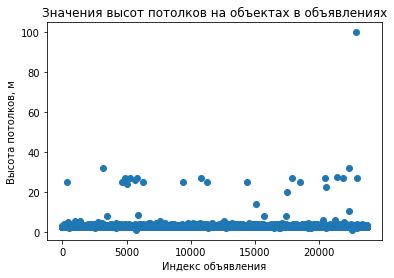

In [22]:
# В столбце ceiling_height максимальное знаяение аномально высокое
data['ceiling_height'].plot(style='o', title='Значения высот потолков на объектах в объявлениях', ylabel='Высота потолков, м', \
                           xlabel='Индекс объявления')
plt.show()

In [23]:
data[data['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [24]:
# Высота потолков была указана ошибочно, в апартаментах она не может быть 100м. Заменим это значение медианным
data.loc[data['ceiling_height'] == 100, 'ceiling_height'] = data['ceiling_height'].median()

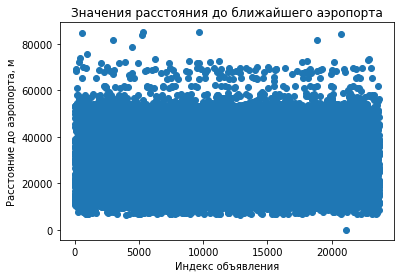

In [25]:
# Столбец airports_nearest
data['airports_nearest'].plot(style='o', title='Значения расстояния до ближайшего аэропорта', \
                              ylabel='Расстояние до аэропорта, м', xlabel='Индекс объявления')
plt.show()

In [26]:
# Аномальное значение 0
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [27]:
# Заменим 0 на медианное значение для Санкт-Петербурга
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = (
    data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()
)

**Вывод:**
- в данных были обработаны пропущенные значения для каждого из столбцов и заменены там, где это было возможно.
- в столбце first_day_xposition был изменен тип данных для хранения сведений о дате размещения объявления.
- в столбце is_apartment тип данных был изменен на bool.
- в данных с названием населенных пунктов были обработаны неявные дубликаты.
- изменено название столбца с *cityCenters_nearest* на *city_centers_nearest* в соответствии с общепринятой стилистикой.
- были обработаны аномальные значения.

## Добавьте в таблицу новые столбцы

In [28]:
# Цена одного квадратного метра
data['price_for_m2'] = round(data['last_price']/data['total_area'], 2)

In [29]:
# День недели публикации объявления
data['week_day'] = data['first_day_exposition'].dt.weekday

In [30]:
# Месяц публикации объявления
data['month_appear'] = data['first_day_exposition'].dt.month

In [31]:
# Год публикации
data['year_appear'] = data['first_day_exposition'].dt.year

In [32]:
# Тип этажа квартиры
def floor_type(floor, total_floors):
    if floor == total_floors:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

data['floor_type'] = data.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis = 1)

In [33]:
# Расстояние до центра города в километрах
data['center_nearest_km'] = round(data['city_centers_nearest']/1000)

In [34]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month_appear,year_appear,floor_type,center_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,89.797718,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.437211,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


**Вывод**
- в таблицу добавлены новые столбцы с данными о цене за квадратный метр; дне недели, месяце и годе публикации объявления; категории этажа; расстоянии до центра города в километрах.

## Исследовательский анализ данных

### Изучение данных по столбцам путем построения гистрограмм, поиск и обработка аномальных значений

Большинство объектов из объявлений обладают общей площадью от 25 до 150 метров кв.

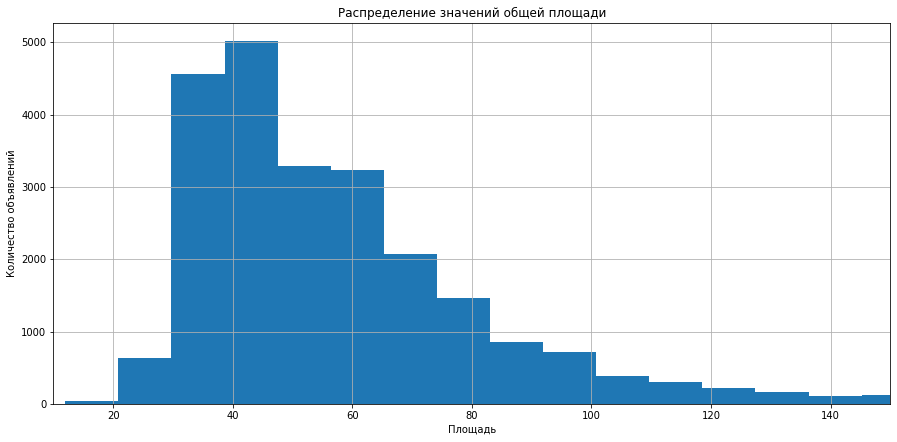

In [35]:

data['total_area'].hist(bins=100, figsize=(15, 7))
plt.xlim(10, 150)
plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

Основная масса квартир в объявлении с жилой площадью до 100 м2.

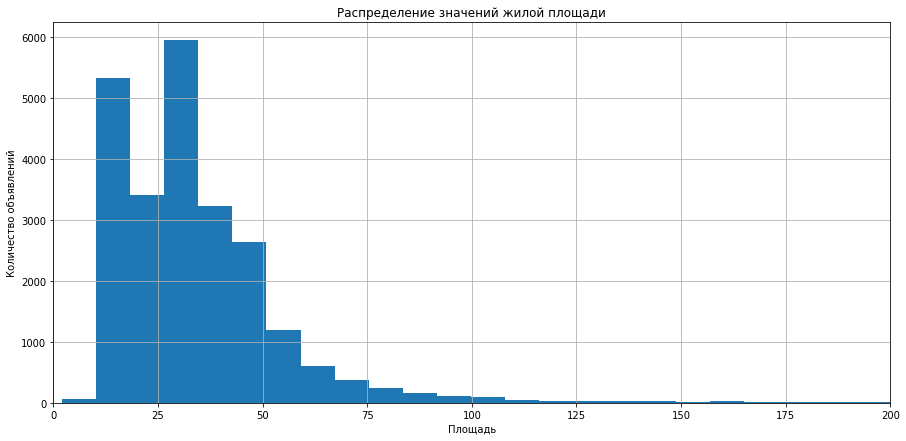

In [37]:

data['living_area'].hist(bins=50, figsize=(15,7))
plt.xlim(0, 200)

plt.title('Распределение значений жилой площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

Наиболее часто значение площади кухни принимает значение от 5 до 15 м2. 


Значения выше 30 встречаются достаточно редко.

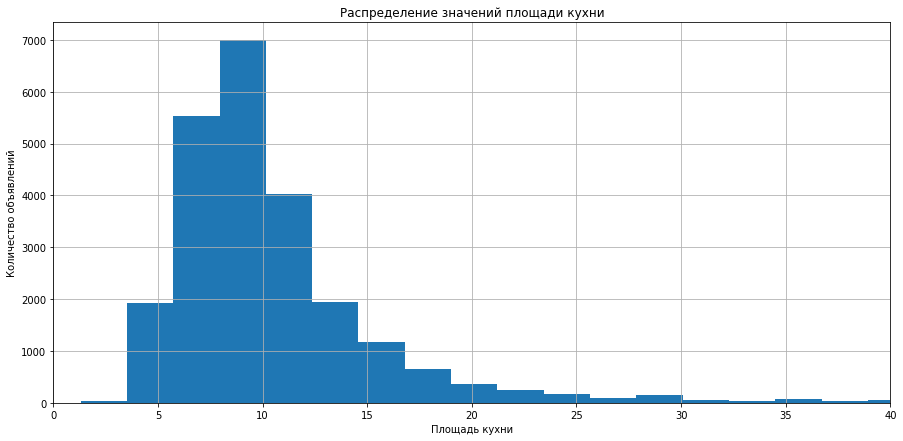

In [38]:
data['kitchen_area'].hist(bins=50, figsize=(15, 7))
plt.xlim(0, 40)

plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь кухни') 
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир в объявлениях стоимостью до 20 млн.

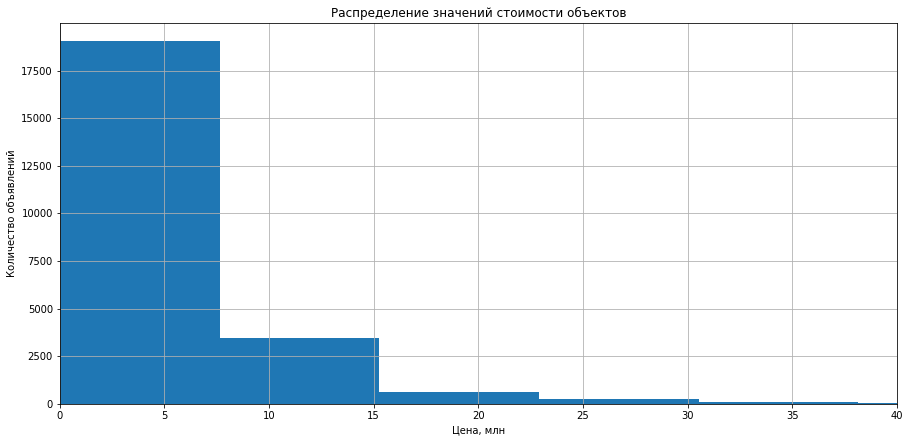

In [39]:
(data['last_price']/1000000).hist(bins=100, figsize=(15, 7))
plt.xlim(0, 40)

plt.title('Распределение значений стоимости объектов')
plt.xlabel('Цена, млн') 
plt.ylabel('Количество объявлений')
plt.show()

Основная масса квартир из объявлений имеют от 1 до 4 комнат.

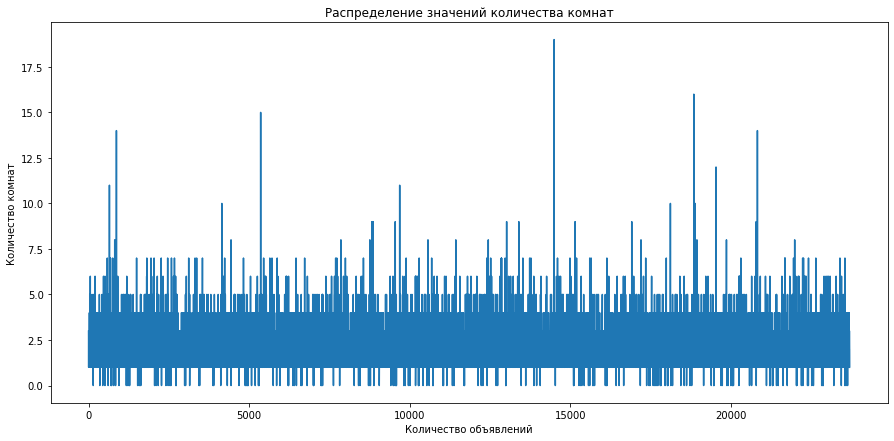

In [40]:
data['rooms'].plot(figsize=(15, 7), title='Распределение значений количества комнат', \
                  ylabel='Количество комнат', xlabel='Количество объявлений')
plt.show()

Аномальные значения для количества комнат это 0 (не может быть 0 комнат). 
Строки со значением комнат больше 7 нужно посмотреть.

In [41]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В столбцах, где значение комнат 0 и studio == True, количество комнат можно заменить на 1. 

(скорее всего была ошибка при ручном заполнении данных)

In [42]:
data.loc[(data['rooms'] == 0)&(data['studio'] == True), 'rooms'] = 1

В столбце, где значение комнат 0 и площадь квартиры меньше равна медианной для однокомнатных квартир, заменим количество комнат на 1

In [43]:

print('Медианная площадь для однокомнатной квартиры', data.loc[data['rooms'] == 1, 'total_area'].median())
data.loc[(data['rooms'] == 0)&(data['total_area'] <= 36.4), 'rooms'] = 1

Медианная площадь для однокомнатной квартиры 36.4


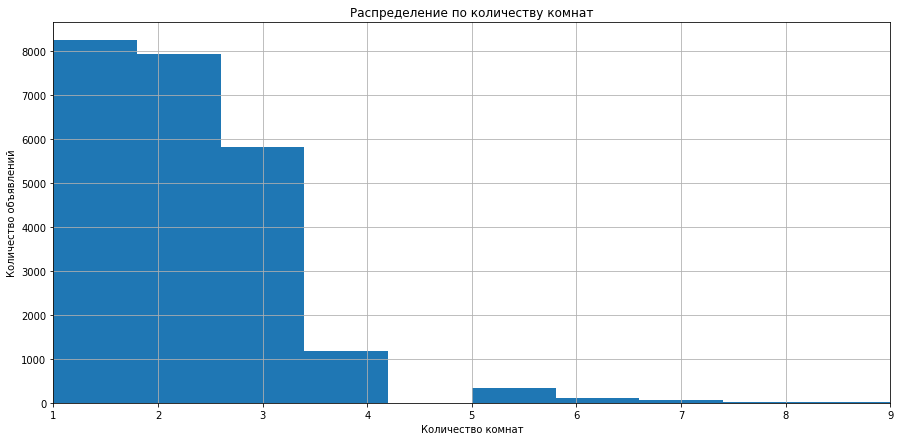

In [44]:
# Исключим данные: оставшиеся квартиры с 0 комнат и квартиры, где комнат больше 10
data = data.query('(rooms < 10) and (rooms != 0)')
data['rooms'].hist(bins=10, figsize=(15, 7))
plt.xlim(1, 9)

plt.title('Распределение по количеству комнат')
plt.xlabel('Количество комнат') 
plt.ylabel('Количество объявлений')
plt.show()

Данные по высоте потолков.

В основном в квартирах высота потолков от 2 до 3 метров.

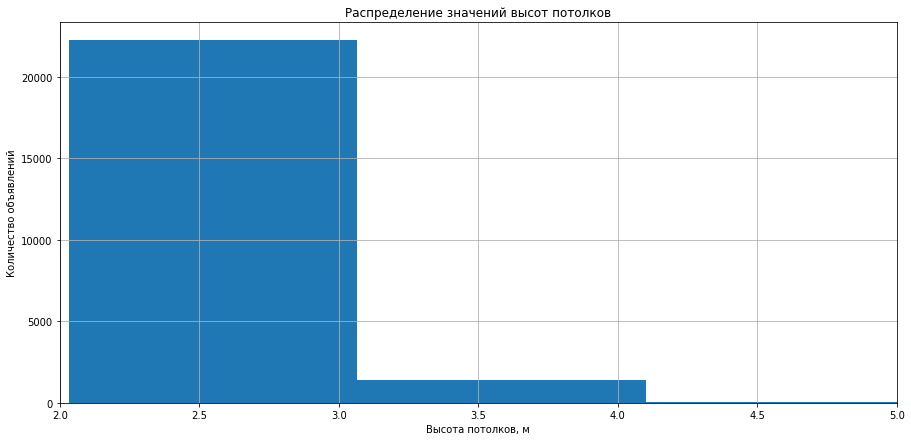

In [45]:
data['ceiling_height'].hist(bins=30, figsize=(15,7))
plt.xlim(2, 5)

plt.title('Распределение значений высот потолков')
plt.xlabel('Высота потолков, м') 
plt.ylabel('Количество объявлений')
plt.show()

Значения высоты потолков больше 20 м, скорее всего внесены с ошибкой (не 25, а 2.5)


В таких строках заменим значения на исходное значение/10 (переведем в метры)

In [46]:
data.query('ceiling_height >= 20')['ceiling_height']

355      25.0
3148     32.0
4643     25.0
4876     27.0
5076     24.0
5246     27.0
5669     26.0
5807     27.0
6246     25.0
9379     25.0
10773    27.0
11285    25.0
14382    25.0
17496    20.0
17857    27.0
18545    25.0
20478    27.0
20507    22.6
21377    27.5
21824    27.0
22336    32.0
22938    27.0
Name: ceiling_height, dtype: float64

In [47]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data[data['ceiling_height'] >= 20]['ceiling_height']/10

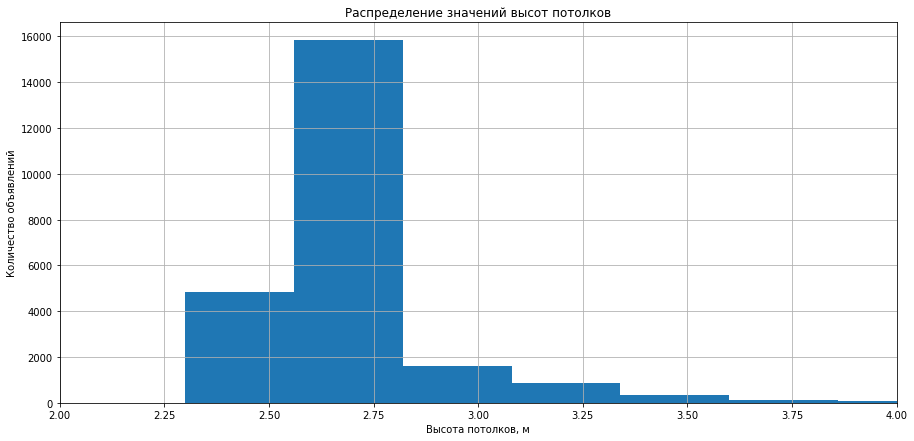

In [48]:
data['ceiling_height'].hist(bins=50, figsize=(15, 7))
plt.xlim(2, 4)

plt.title('Распределение значений высот потолков')
plt.xlabel('Высота потолков, м') 
plt.ylabel('Количество объявлений')
plt.show()

Распределение по типу этажа: с данными все впорядке, большинство квартир относится к категории "другой" этаж.
Оставшие квартиры распределяются между категориями "первый", "последний".

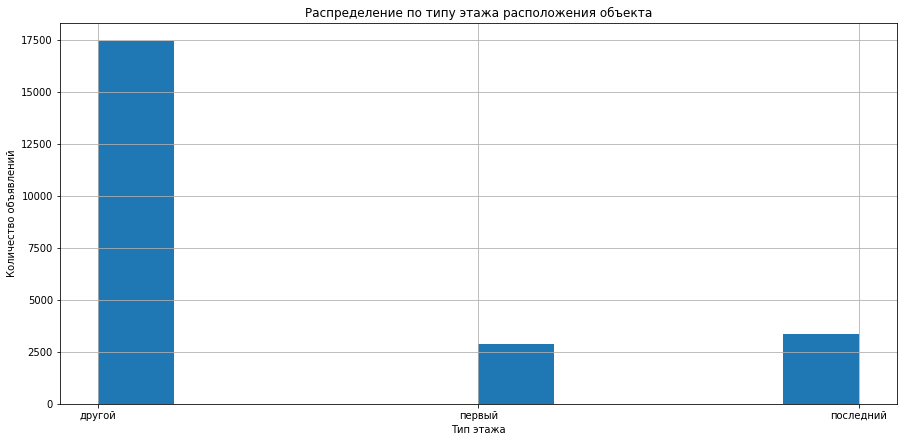

In [49]:
data['floor_type'].hist(bins=10, figsize=(15, 7))

plt.title('Распределение по типу этажа расположения объекта')
plt.xlabel('Тип этажа') 
plt.ylabel('Количество объявлений')
plt.show()

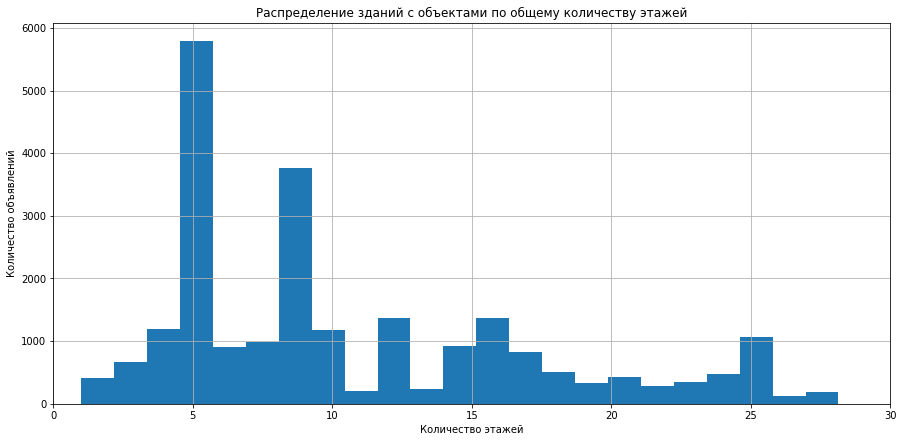

In [50]:
data['floors_total'].hist(bins=50, figsize=(15, 7))
plt.xlim(0, 30)

plt.title('Распределение зданий с объектами по общему количеству этажей')
plt.xlabel('Количество этажей') 
plt.ylabel('Количество объявлений')
plt.show()

Посмотрим на строки, где общее число этажей больше 30

In [51]:
data['floors_total'].value_counts().sort_values()

52.0       1
37.0       1
34.0       1
29.0       1
60.0       1
33.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     124
21.0     158
27.0     164
11.0     203
13.0     229
20.0     271
22.0     286
19.0     339
23.0     352
15.0     365
2.0      383
8.0      390
24.0     469
18.0     505
14.0     553
7.0      589
3.0      668
17.0     833
6.0      912
25.0    1074
10.0    1174
4.0     1198
12.0    1362
16.0    1375
9.0     3761
5.0     5784
Name: floors_total, dtype: int64

Все высотные здания находятся в Санкт-Петербурге, с данными все впорядке

In [52]:
data.query('floors_total >= 30')[['floors_total', 'locality_name']]

,floors_total,locality_name
397,36.0,Санкт-Петербург
871,35.0,Санкт-Петербург
1060,35.0,Санкт-Петербург
1697,34.0,Санкт-Петербург
1917,35.0,Санкт-Петербург
2253,60.0,Кронштадт
2966,35.0,Санкт-Петербург
4855,35.0,Санкт-Петербург
5749,35.0,Санкт-Петербург
5807,36.0,Санкт-Петербург


Данные по расстоянию до центра города в метрах.


Основная масса квартир расположены на расстоянии от 0 до 20000 м.

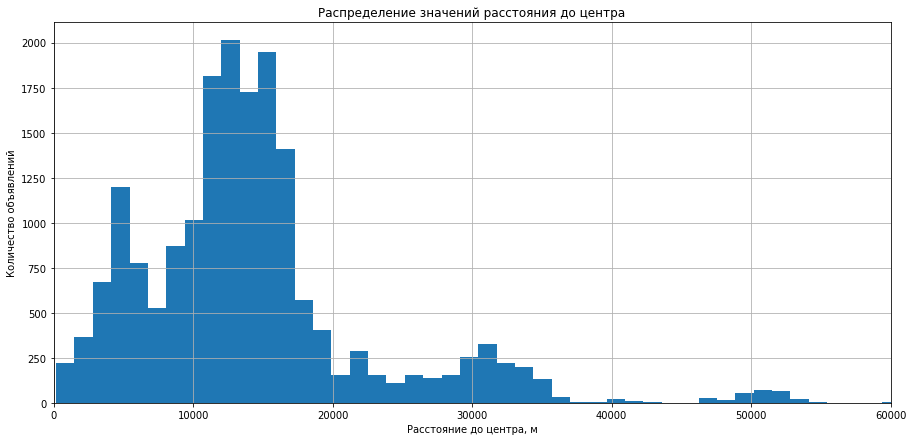

In [53]:
data['city_centers_nearest'].hist(bins=50, figsize=(15, 7))
plt.xlim(0, 60000)

plt.title('Распределение значений расстояния до центра')
plt.xlabel('Расстояние до центра, м') 
plt.ylabel('Количество объявлений')
plt.show()

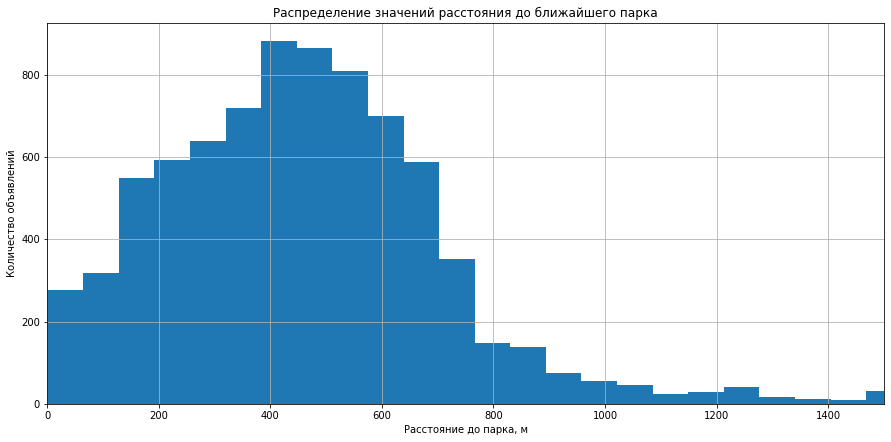

In [54]:
data['parks_nearest'].hist(bins=50, figsize=(15, 7))
plt.xlim(0, 1500)

plt.title('Распределение значений расстояния до ближайшего парка')
plt.xlabel('Расстояние до парка, м') 
plt.ylabel('Количество объявлений')
plt.show()

Основная масса парков расположена на расстоянии до 800 м от объектов.

**Вывод**
- По гисторграммам были изучены данные по каждому столбцу.
- В столбцах rooms, ceiling_height бли обработаны аномальные значения.
- Большинство объектов из объявлений обладают общей площадью от 25 до 150 м2.
- Основная масса квартир в объявлении с жилой площадью до 100 м2.
- Наиболее часто значение площади кухни принимает значение от 5 до 15 м2. 
- Большинство квартир в объявлениях стоимостью до 20 млн. Гораздо реже встречаются объявления со стоимостью квартир от 20 до 50 млн.
- Основная масса квартир из объявлений имеют от 1 до 4 комнат.
- В основном в квартирах высота потолков от 2 до 3 метров.
- Большинство квартир относится к категории "другой" этаж. Оставшие квартиры распределяются между категориями "первый", "последний".
- Высотность домов обычно сотавляет до 30 этажей. На гистограмме видны пики среди 5-ти и 9-ти этажных домов.
- Основная масса квартир расположены на расстоянии от 0 до 20000 м.
- Среди квартир, где есть парки поблизости, сновная масса парков расположена в 800 метрах от объектов недвижимости.

### Частота продажи квартир: насколько быстро они продавались

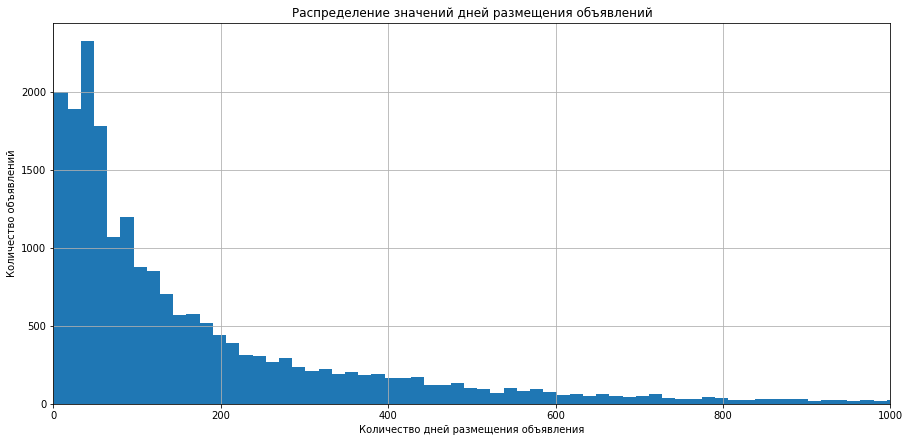

In [55]:
data['days_exposition'].hist(bins=100, figsize=(15, 7))
plt.xlim(0, 1000)

plt.title('Распределение значений дней размещения объявлений')
plt.xlabel('Количество дней размещения объявления') 
plt.ylabel('Количество объявлений')
plt.show()

In [56]:
print('Среднее количество дней размещения объявления:', data['days_exposition'].mean())
print('Медианное значение количества дней размещения объявления:', data['days_exposition'].median())

Среднее количество дней размещения объявления: 180.83215487394548
Медианное значение количества дней размещения объявления: 95.0


Среднее значение дней размещения объявления значительно больше, чем медианное. Это означает, что среднее смещается из-за наличия в данных необычно больших или необычно малых значениях.

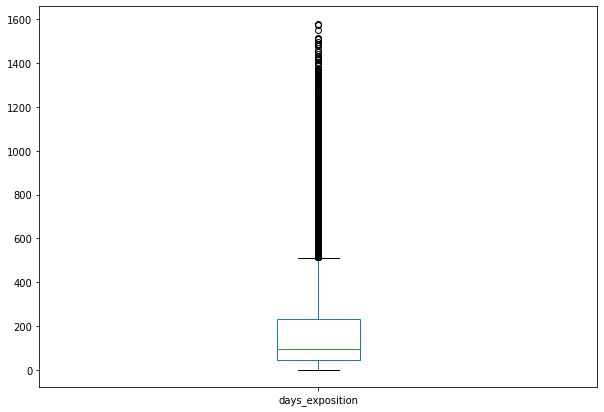

count    20507.000000
mean       180.832155
std        219.568292
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [57]:
data['days_exposition'].plot(kind='box', figsize=(10, 7))
plt.show()
data['days_exposition'].describe()

In [58]:
too_fast = data.query('days_exposition <= 45')['days_exposition'].count()
too_slow = data.query('days_exposition >= 232')['days_exposition'].count()
total = data['days_exposition'].count()
print(f'Процент слишком быстрых продаж: {(too_fast/total):.2%}')
print(f'Процент слишком долгих продаж: {(too_slow/total):.2%}')

Процент слишком быстрых продаж: 24.83%
Процент слишком долгих продаж: 25.02%


 **Вывод:**
 
 Обычно продажа занимает около 100 дней (пик на гистограмме).
 
 Слишком долгая продажа - это продажа, которая занимает больше 232 дней (75 процентиль).
 
 Слишком быстрая продажа - это прадажа, которая занимает менее 45 дней (25 процентиль).

### Оценка факторов, влияющих на стоимость квартиры.

*Общая площадь и стоимость*

In [59]:
# Для удобства добавим столбец, где стоимость квартиры будет указана в млн.
data['price_mln'] = round(data['last_price']/1000000, 2)

На графике видно два выброса, поставим ограничение на y и х, чтобы увидеть распределение основной массы данных.

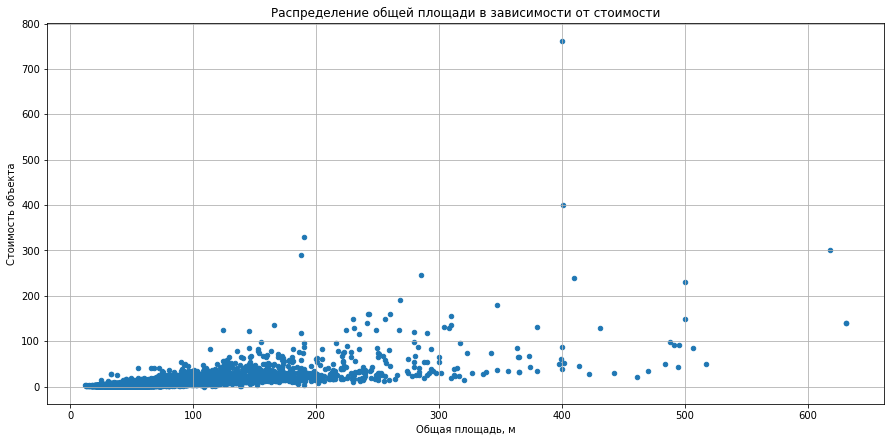

In [60]:
data.plot(x='total_area', y='price_mln', kind='scatter', grid=True, title='Распределение общей площади в зависимости от стоимости', \
         xlabel='Общая площадь, м', ylabel='Стоимость объекта', figsize=(15, 7))
plt.show()

На графике ниже виден тренд на возрастание цены квартиры при увеличении общей площади.
Возможно зависимость нелинейная или опосредованна третьим фактором.


В пункте 4.1 выяснилось, что основное количество квартир в объявлениях продаются по цене до 20 млн, и гораздо реже от 20 до 50. Посмотрим на участок графика с квартирами стоимостью до 50 млн.


При этом, чтобы точно оценить влияние площади на стоимость, необходима группировка по населенным пунктам.

Коэффициент корреляции: 0.6430717431927027


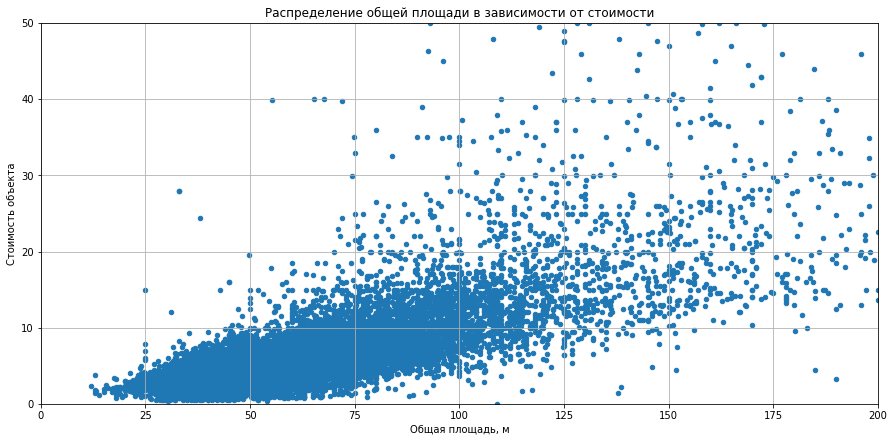

In [61]:
data.plot(x='total_area', y='price_mln', kind='scatter', ylim=(0, 50), xlim=(0, 200), grid=True, \
          title='Распределение общей площади в зависимости от стоимости', \
          xlabel='Общая площадь, м', ylabel='Стоимость объекта', figsize=(15, 7))
print('Коэффициент корреляции:', data['total_area'].corr(data['price_mln']))

При группировке данных по населенным пунктам, зависимость цены от общей стоимости не прослеживается, т.к. такая зависимость вероятно есть внутри каждого населенного пункта, а не между ними.

<AxesSubplot:title={'center':'Распределение общей площади в зависимости от стоимости'}, xlabel='Общая площадь, м', ylabel='Стоимость объекта'>

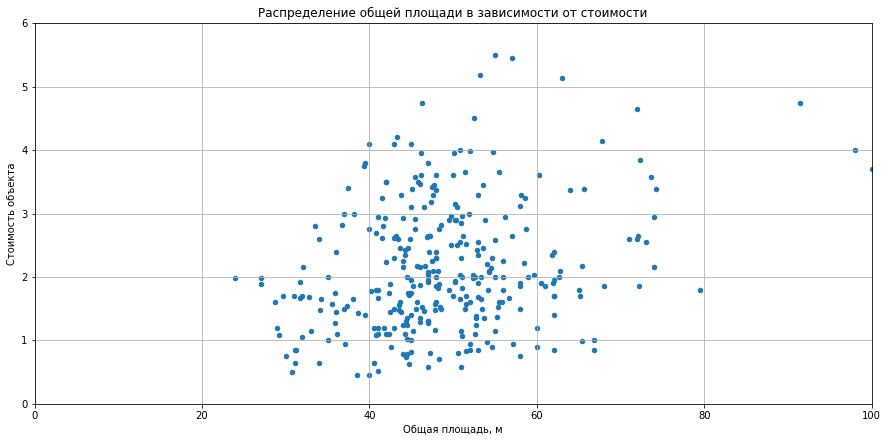

In [62]:
(data
 .pivot_table(index='locality_name', values=['price_mln','total_area'], aggfunc='median')
 .plot(kind='scatter', y='price_mln', x='total_area', ylim=(0, 6), xlim=(0, 100), grid=True, \
       title='Распределение общей площади в зависимости от стоимости', \
       xlabel='Общая площадь, м', ylabel='Стоимость объекта', figsize=(15, 7))
)

*Жилая площадь и цена*

Видно, что в данных есть выбросы, но при этом в основной массе данных прослеживается положительный тренд.

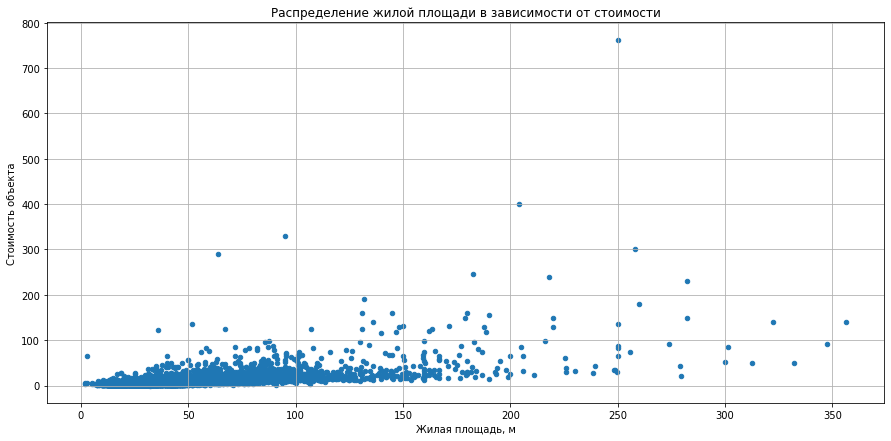

In [63]:
data.plot(x='living_area', y='price_mln', kind='scatter', grid=True,  title='Распределение жилой площади в зависимости от стоимости', \
       xlabel='Жилая площадь, м', ylabel='Стоимость объекта', figsize=(15, 7))
plt.show()

На графике ниже видены "столбцы": стоимость квартир одного и того же метража вероятно зависит от расположения. Коэффициент корреляции ниже, чем у общей площади.

Коэффициент корреляции: 0.5796553556899826


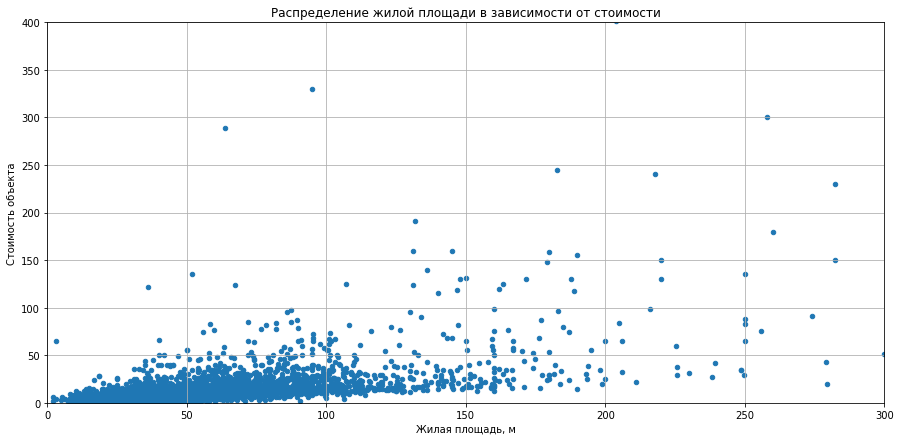

In [64]:
data.plot(x='living_area', y='price_mln', kind='scatter', ylim=(0, 400), xlim=(0, 300), grid=True, \
          title='Распределение жилой площади в зависимости от стоимости', \
          xlabel='Жилая площадь, м', ylabel='Стоимость объекта', figsize=(15, 7))
print('Коэффициент корреляции:', data['living_area'].corr(data['price_mln']))

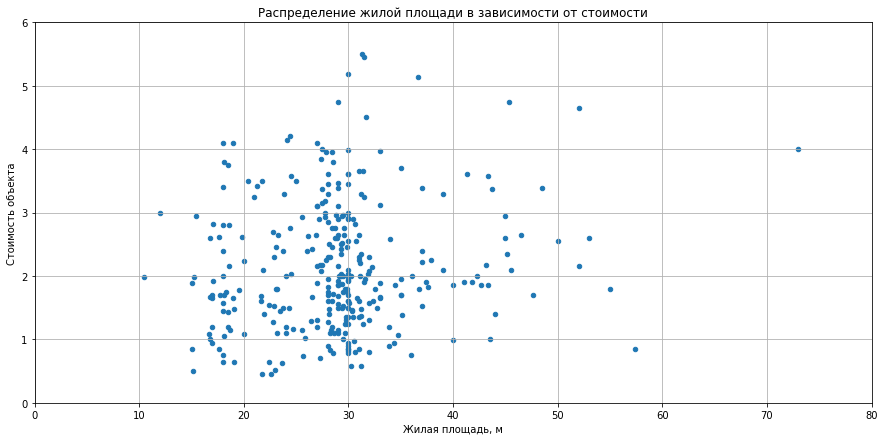

In [65]:
(data
 .pivot_table(index='locality_name', values=['price_mln','living_area'], aggfunc='median')
 .plot(kind='scatter', y='price_mln', x='living_area', ylim=(0, 6), xlim=(0, 80), grid=True, \
       title='Распределение жилой площади в зависимости от стоимости', \
       xlabel='Жилая площадь, м', ylabel='Стоимость объекта', figsize=(15, 7))
)
plt.show()

На графике выше данные сгруппированы по населенным пунктам, для каждого из которых взято медианное значение жилой площади. На графике образовался "столбец" - при одной и той же жилой площади, цена отличается. Это указывает на зависимость от месторасположения объекта.

*Площадь кухни и стоимость объекта*

Видно, что в данных есть выбросы, но при этом в основной массе данных прослеживается небольшой положительный тренд.

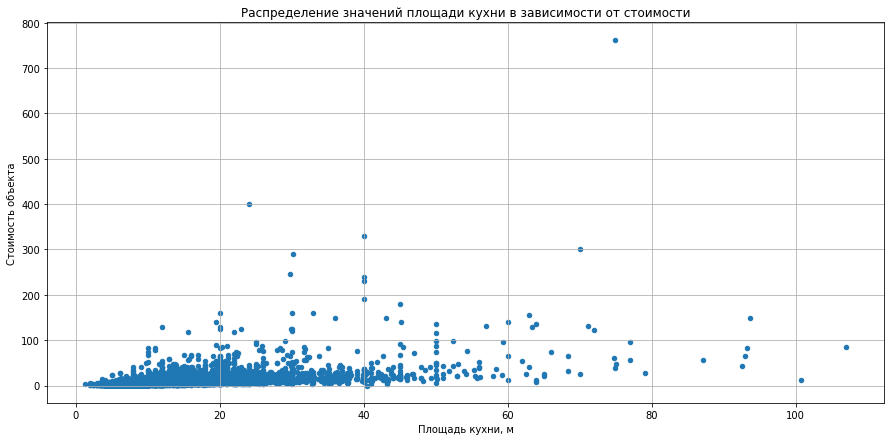

In [66]:
data.plot(x='kitchen_area', y='price_mln', kind='scatter', grid=True, \
          title='Распределение значений площади кухни в зависимости от стоимости', \
          xlabel='Площадь кухни, м', ylabel='Стоимость объекта', figsize=(15, 7))
plt.show()

Зависимость между площадью кухни и стоимостью объекта недвижимости слабая.

Коэффициент корреляции: 0.5061578463288139


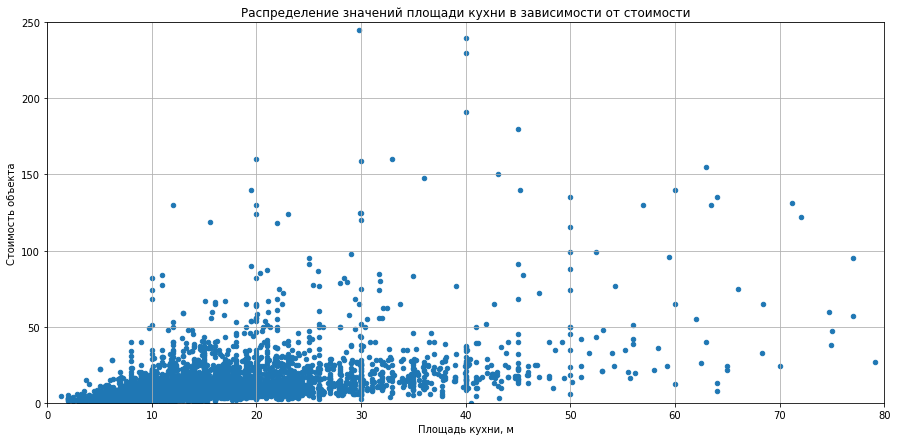

In [67]:
data.plot(x='kitchen_area', y='price_mln', kind='scatter', ylim=(0, 250), xlim=(0, 80), grid=True, \
          title='Распределение значений площади кухни в зависимости от стоимости', \
          xlabel='Площадь кухни, м', ylabel='Стоимость объекта', figsize=(15, 7))
print('Коэффициент корреляции:', data['kitchen_area'].corr(data['price_mln']))

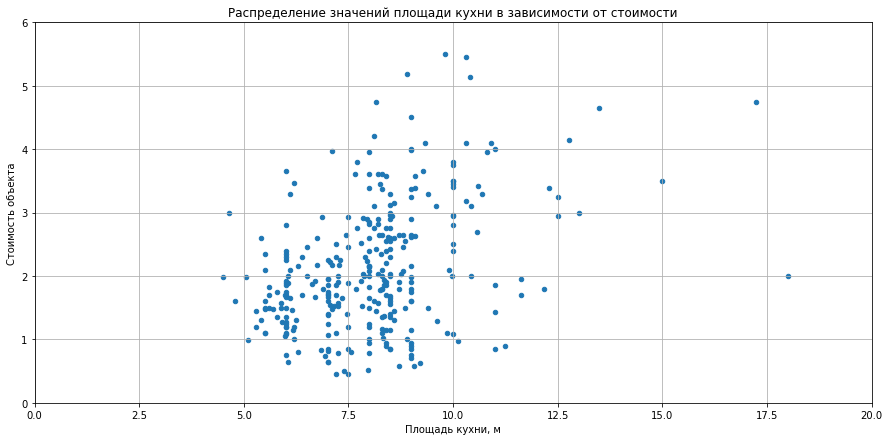

In [68]:
(data
 .pivot_table(index='locality_name', values=['price_mln','kitchen_area'], aggfunc='median')
 .plot(kind='scatter', y='price_mln', x='kitchen_area', ylim=(0, 6), xlim=(0, 20), grid=True, \
       title='Распределение значений площади кухни в зависимости от стоимости', \
          xlabel='Площадь кухни, м', ylabel='Стоимость объекта', figsize=(15, 7))
)
plt.show()

*Количество комнат и стоимость объекта*

<AxesSubplot:title={'center':'Распределение значений количества комнат в зависимости от стоимости'}, xlabel='Количество комнат', ylabel='Стоимость объекта'>

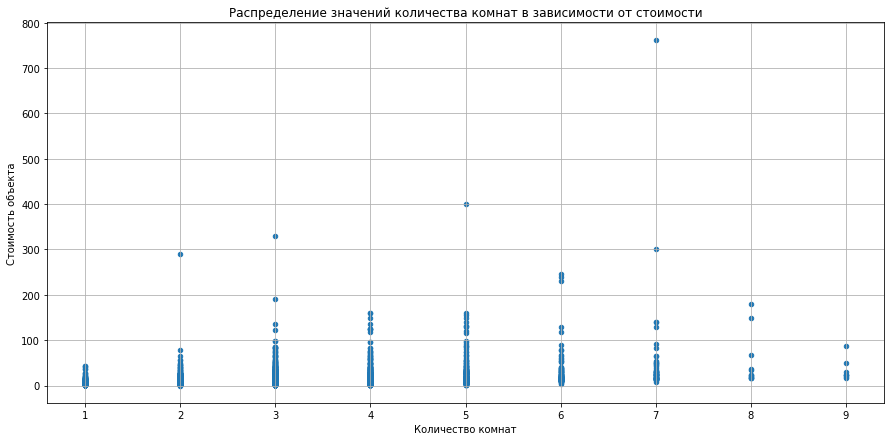

In [69]:
data.plot(x='rooms', y='price_mln', kind='scatter', grid=True, \
          title='Распределение значений количества комнат в зависимости от стоимости', \
          xlabel='Количество комнат', ylabel='Стоимость объекта', figsize=(15, 7))

Коэффициент корреляции: 0.3614469389254089


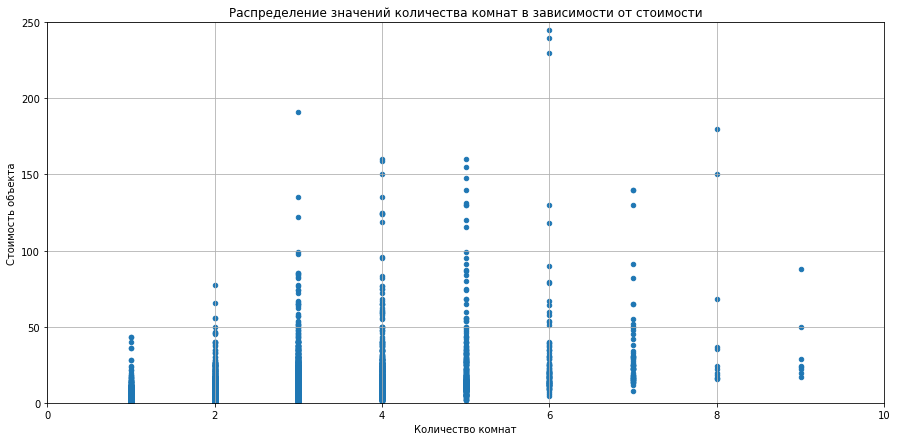

In [70]:
data.plot(x='rooms', y='price_mln', kind='scatter', ylim=(0, 250), xlim=(0, 10), grid=True, \
          title='Распределение значений количества комнат в зависимости от стоимости', \
          xlabel='Количество комнат', ylabel='Стоимость объекта', figsize=(15, 7))
print('Коэффициент корреляции:', data['rooms'].corr(data['price_mln']))

График ниже показывает, что стоимость объекта увеличивается с увеличением количества комнат.

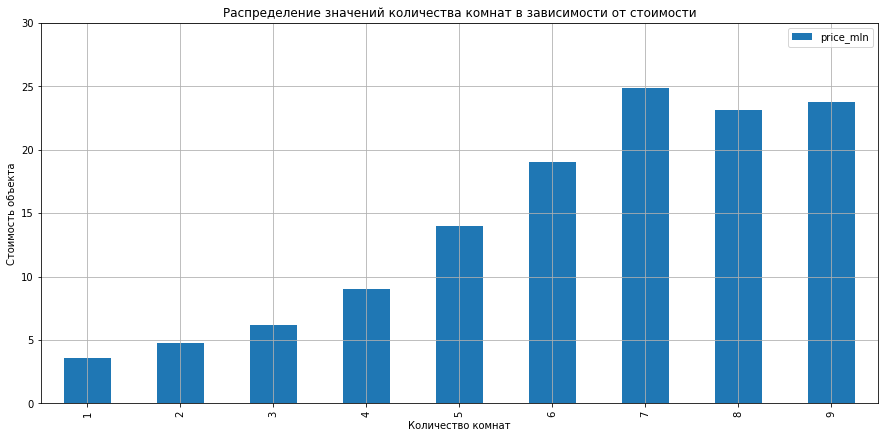

In [71]:
(data
 .pivot_table(index='rooms', values=['price_mln'], aggfunc='median')
 .reset_index()
 .plot(kind='bar', y='price_mln', x='rooms', ylim=(0, 30), xlim=(0, 10), grid=True, \
       title='Распределение значений количества комнат в зависимости от стоимости', \
          xlabel='Количество комнат', ylabel='Стоимость объекта', figsize=(15, 7))
)
plt.show()

In [72]:
# Коэффециент корреляции 
(data
 .pivot_table(index='rooms', values=['price_mln'], aggfunc='median')
 .reset_index()
 .corr()
)

,rooms,price_mln
rooms,1.00000,0.96429
price_mln,0.96429,1.00000


*Тип этажа и стоимость объекта*

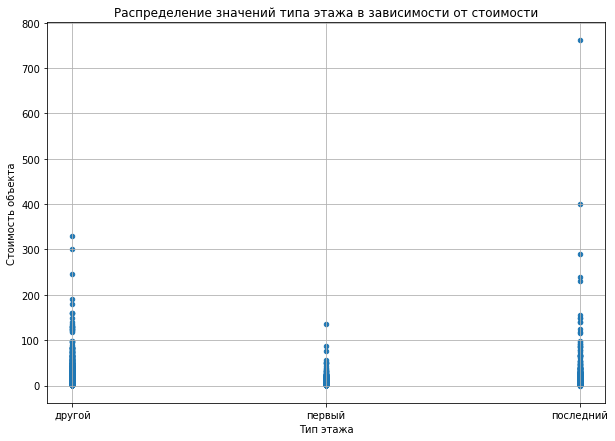

In [73]:
# График по распределению цены в зависимость от типа этажа 
data.plot(x='floor_type', y='price_mln', kind='scatter', grid=True, \
          title='Распределение значений типа этажа в зависимости от стоимости', \
          xlabel='Тип этажа', ylabel='Стоимость объекта', figsize=(10, 7))
plt.show()

На графике ниже видно, что медианная цена объектов с типом этажа "другой" выше, чем объектов расположенных на первых и последних этажах. Между объектами на первых и последних этажах дешевле те, что расположены на первых.

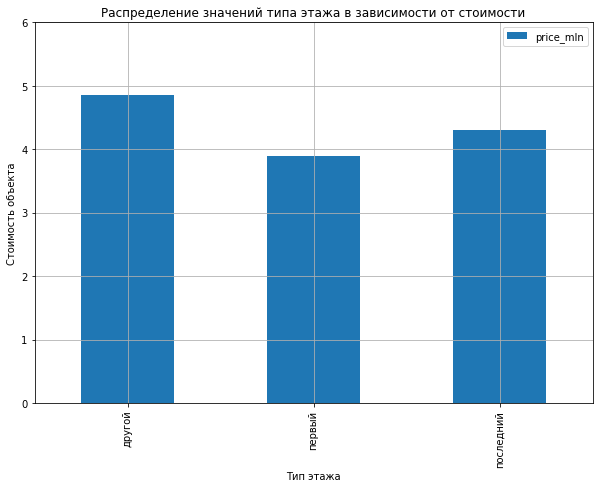

In [75]:
(data
 .pivot_table(index='floor_type', values=['price_mln'], aggfunc='median')
 .reset_index()
 .plot(kind='bar', y='price_mln', x='floor_type', ylim=(0, 6), grid=True, \
       title='Распределение значений типа этажа в зависимости от стоимости', \
          xlabel='Тип этажа', ylabel='Стоимость объекта', figsize=(10, 7))
)
plt.show()

*Количество дней размещения объявления и стоимость объектов*

На графике ниже видно практически прямую линию, что стоимость объектов не зависит от дня недели размещения объявления.

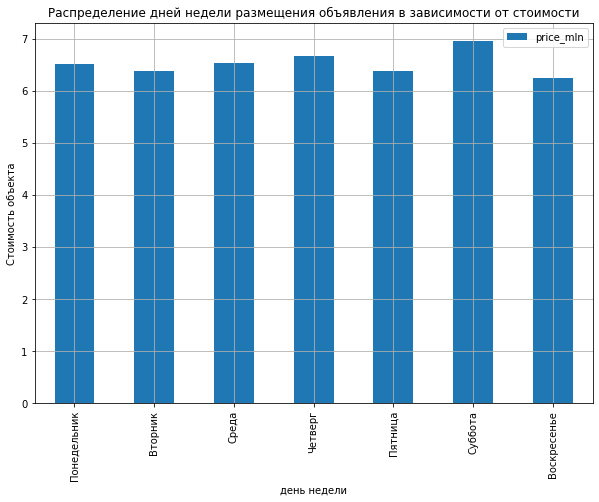

In [76]:
(data
 .pivot_table(index='week_day', values=['price_mln'])
 .reset_index()
 .plot(kind='bar', y='price_mln', x='week_day', grid=True, \
       title='Распределение дней недели размещения объявления в зависимости от стоимости', \
          xlabel='день недели', ylabel='Стоимость объекта', figsize=(10, 7))
)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.show()

На графике ниже есть небольшие колебания: объекты, объявления по которым размещены в январе, апреле, и сентябре, обладали в среднем чуть большей стоимостью.

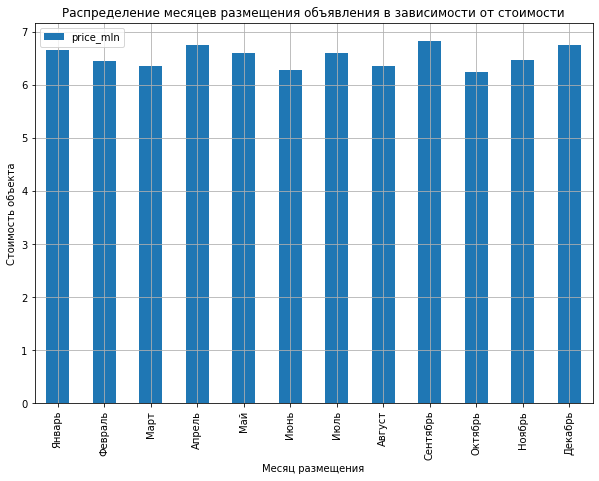

In [77]:
(data
 .pivot_table(index='month_appear', values=['price_mln'])
 .reset_index()
 .plot(kind='bar', y='price_mln', x='month_appear', grid=True, \
       title='Распределение месяцев размещения объявления в зависимости от стоимости', \
          xlabel='Месяц размещения', ylabel='Стоимость объекта', figsize=(10, 7))
)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], \
           ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.show()

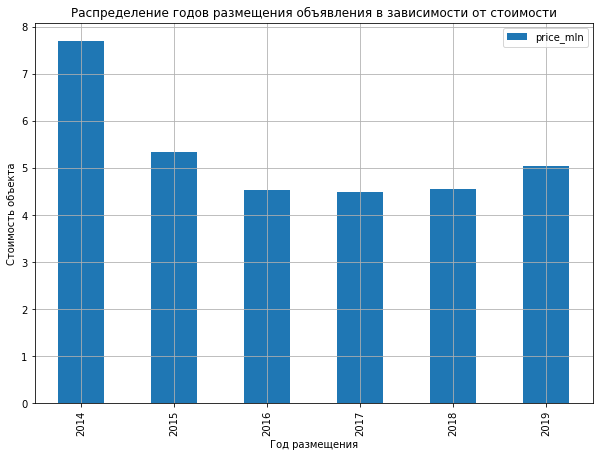

In [78]:
(data
 .pivot_table(index='year_appear', values=['price_mln'], aggfunc='median')
 .reset_index()
 .plot(kind='bar', y='price_mln', x='year_appear', grid=True, \
       title='Распределение годов размещения объявления в зависимости от стоимости', \
          xlabel='Год размещения', ylabel='Стоимость объекта', figsize=(10, 7))
)

plt.show()

Объекты, размещенные в объявлениях в 2014 году, стоили дороже. Дальше виден нисходящий тренд по медианной стоимости квартир.

 **Вывод:**
 - Между общей площадью и стоимостью объекта есть зависимость: с увеличением общей площади происходит увеличение стоимости.
 - Между жилой площадью и стоимостью объекта также наблюдается умеренная положительная связь.
 - Увеличение площади кухни в меньшей степени влияет на увеличение стоимости объекта.
 - Связь между уоличеством комнат и стоимостью объекта положительная: с увеличением количества комнат растет и стоимость объекта.
 - Выше стоимость объектов в категории этажа "другой". Ниже всего стоимость объектов в категории "первый этаж".
 - День и месяц размещения объявления не влияют на стоимость квартир.
 - Стоимость объектов также зависит от того, в каком населенном пункте они распологаются.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [79]:
# Сводная таблица по топ 10 населенных пунктов по количеству объявлений
sorted_days_exp = (data
 .pivot_table(index='locality_name', values='days_exposition', aggfunc='count')
 .sort_values('days_exposition', ascending=False)
 .head(10)
)
sorted_days_exp

,days_exposition
locality_name,
Санкт-Петербург,13628
поселок Мурино,551
поселок Шушары,408
Всеволожск,339
Колпино,308
Пушкин,307
поселок Парголово,302
деревня Кудрово,298
Гатчина,268


In [80]:
# Таблица со значениями средней стоимости м2 для каждого из населенных пунктов
mean_m2 = (data
           .pivot_table(index='locality_name', values='price_for_m2')
           .sort_values('price_for_m2', ascending=False)
          )
mean_m2['price_for_m2'] = round(mean_m2['price_for_m2'], 2)
mean_m2

,price_for_m2
locality_name,
Зеленогорск,115122.80
Санкт-Петербург,114828.22
поселок Репино,104238.61
Пушкин,103125.82
Сестрорецк,101757.62
...,...
поселок Совхозный,12629.13
деревня Выскатка,12335.48
деревня Вахнова Кара,11688.31


In [81]:
# Сводная таблица со средней ценой м2 для топ 10 населенных пунктов по количеству объявлений
merged_table = (sorted_days_exp
                .merge(mean_m2, on='locality_name', how='left')
                .sort_values('price_for_m2', ascending=False)
)
merged_table

,days_exposition,price_for_m2
locality_name,,
Санкт-Петербург,13628,114828.22
Пушкин,307,103125.82
деревня Кудрово,298,92547.79
поселок Парголово,302,90175.91
поселок Мурино,551,85681.76
поселок Шушары,408,78677.36
Колпино,308,75424.58
Гатчина,268,68746.15
Всеволожск,339,68654.47


**Вывод:**
- Наибольшее количество объявлений было размещено по объектам в г. Санкт-Петербург.
- Наибольшая средняя цена за м2 была зафиксирована по объектам в Зеленогорске (курортный район).
- Среди населенных пунктов из топ 10 по количеству объявлений самая высокая средняя цена за м2 в г. Санкт-Петербург (114,8 тысяч за м2; самая низкая цена за м2 - в г. Выборг (58 тысяч за м2).

### Средняя стоимость квартир в Санк-Петербурге в зависимости от расстояния до центра

In [82]:
# Выберем объекты в г. Санкт-Петербург
data_p = data.query('locality_name == "Санкт-Петербург"')
data_p.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month_appear,year_appear,floor_type,center_nearest_km,price_mln
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0,13.00
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,5.20
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.797718,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0,64.90
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0,10.00
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,40.437211,22,False,...,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0,7.92
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0,5.40
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.300000,3,False,...,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0,5.05
15,16,4650000.0,39.0,2017-11-18,1,2.65,14.0,20.500000,5,False,...,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.0,4.65
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.600000,1,False,...,0.0,NaN,397.0,81707.32,3,11,2017,первый,11.0,6.70
17,6,4180000.0,36.0,2016-09-09,1,2.65,17.0,16.500000,7,False,...,1.0,859.0,571.0,116111.11,4,9,2016,другой,15.0,4.18


In [83]:
# Сводная таблица по данным средней стоимости объекта в зависимости от удаленности от центра
(data_p
 .pivot_table(index='center_nearest_km', values='price_mln')
 .reset_index()
)

,center_nearest_km,price_mln
0,0.0,31.448889
1,1.0,21.145026
2,2.0,17.753172
3,3.0,11.108338
4,4.0,13.254548
5,5.0,14.415136
6,6.0,15.248217
7,7.0,14.775167
8,8.0,9.243378
9,9.0,6.950691


<AxesSubplot:title={'center':'Средняя цена объекта в зависимости от его удаленности от центра'}, xlabel='Количество километров до центра', ylabel='Средняя цена за м2'>

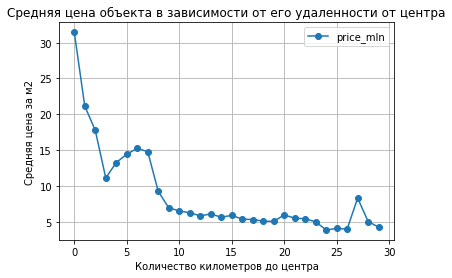

In [84]:
# Построим график по данным таблицы выше
(data_p
 .pivot_table(index='center_nearest_km', values='price_mln')
 .reset_index()
 .plot(style='-o', x='center_nearest_km', y='price_mln', xlabel='Количество километров до центра', \
       ylabel='Средняя цена за м2', title='Средняя цена объекта в зависимости от его удаленности от центра', \
       grid=True)
)

<AxesSubplot:>

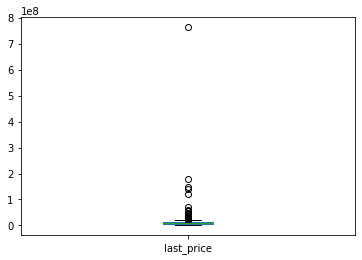

In [85]:
# На графике выше виден пик вниз в цене объектов в 4 км от центра, посмотрим на распределение по 4 км
# Виден выброс, сильно смещающий среднее.
data_p.query('center_nearest_km == 4').sort_values('last_price')['last_price'].plot(kind='box')

<AxesSubplot:title={'center':'Средняя цена объекта в зависимости от его удаленности от центра'}, xlabel='Количество километров до центра', ylabel='Средняя цена за м2'>

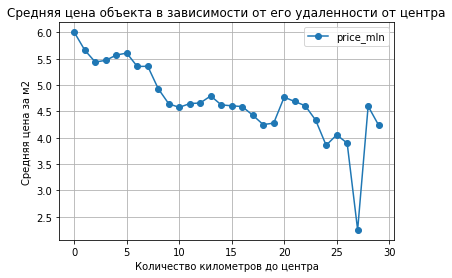

In [86]:
# Построим график без выброса
(data_p
 .query('price_mln < 7')
 .pivot_table(index='center_nearest_km', values='price_mln')
 .reset_index()
 .plot(style='-o', x='center_nearest_km', y='price_mln', xlabel='Количество километров до центра', \
       ylabel='Средняя цена за м2', title='Средняя цена объекта в зависимости от его удаленности от центра', \
       grid=True)
)

In [87]:
# Коэффициент корреляции отрицательный - при увеличении дальности, средняя стоимость падает
(data_p
 .query('price_mln < 7')
 .pivot_table(index='center_nearest_km', values='price_mln')
 .reset_index()
 .corr()
)

,center_nearest_km,price_mln
center_nearest_km,1.000000,-0.815166
price_mln,-0.815166,1.000000


In [88]:
# На графике выше виден пик в цене объектов в 27 км от центра, посмотрим на распределение по 27 км
# Всего два значения, поэтому аномальное значение среднего
data_p.query('center_nearest_km == 27').sort_values('price_mln')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month_appear,year_appear,floor_type,center_nearest_km,price_mln
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,...,0.0,NaN,178.0,70312.50,1,2,2018,последний,27.0,2.25
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0,14.35


**Вывод:**


С увеличением расстояния от центра средняя стоимость объектов в г. Санкт-Петербург снижается.

## Выводы

**В рамках предобработки данных было выполнено:**

- Изучены пропуски в данных, их количество, причины появления. Пропущенные значения, там, где это возможно, были заменены.
- В столбцах is_apartment и first_day_exposition был изменен тип данных в соответствии с хранящимися в столбцах значениями.
- Изменено название столбца в соответствии с синтаксическими правилами: с cityCenters_nearest на city_centers_nearest.
- Из названий населенных пунктов исключены неявные дубликаты (столбец locality_name).
- Были обработаны аномальные значения в столбцах ceiling_height и airport_nearest.

**В таблицу добавлены новые столбцы для дальнейшего анализа:**

- price_for_m2 - цена за квадратный метр;
- week_day - день недели, в который размещено объявление;
- month_appear - месяц размещения объявления;
- year_appear - год размещения объявления;
- floor_type - тип этажа;
- center_nearest_km - расстояние до центра в километрах.

**В рамках анализа гистограмм по данным из каждого столбца выявлено:**

- По гисторграммам были изучены данные по каждому столбцу.
- В столбцах rooms, ceiling_height бли обработаны аномальные значения.
- Большинство объектов из объявлений обладают общей площадью от 25 до 150 м2.
- Основная масса квартир в объявлении с жилой площадью до 100 м2.
- Наиболее часто значение площади кухни принимает значение от 5 до 15 м2. 
- Большинство квартир в объявлениях стоимостью до 20 млн. Гораздо реже встречаются объявления со стоимостью квартир от 20 до 50 млн.
- Основная масса квартир из объявлений имеют от 1 до 4 комнат.
- В основном в квартирах высота потолков от 2 до 3 метров.
- Большинство квартир относится к категории "другой" этаж. Оставшие квартиры распределяются между категориями "первый", "последний".
- Высотность домов обычно сотавляет до 30 этажей. На гистограмме видны пики среди 5-ти и 9-ти этажных домов.
- Основная масса квартир расположены на расстоянии от 0 до 20000 м.
- Среди квартир, где есть парки поблизости, сновная масса парков расположена в 800 метрах от объектов недвижимости.

**Количество времени до продажи объектов:**

- Обычно продажа квартиры занимала около 100 дней. Аномально быстрые продажи осуществляли менее чем за 45 дней (25 квартиль), аномально долгие продажи - более 232 (75 квартиль).

**Факторы, влияющие на общую стоимость объектов:**

- Между общей площадью и стоимостью объекта есть зависимость: с увеличением общей площади происходит увеличение стоимости.
- Между жилой площадью и стоимостью объекта также наблюдается умеренная положительная связь.
- Увеличение площади кухни в меньшей степени влияет на увеличение стоимости объекта.
- Связь между уоличеством комнат и стоимостью объекта положительная: с увеличением количества комнат растет и стоимость объекта.
- Выше стоимость объектов в категории этажа "другой". Ниже всего стоимость объектов в категории "первый этаж".
- Количество дней размещения объявления никак не влияет на стоимость объекта.
- Стоимость объектов также зависит от того, в каком населенном пункте они распологаются.

**Средняя цена за квадратный метр в населенных пунктах с наибольшим количеством объявлений:**

- Наибольшее количество объявлений было размещено по объектам в г. Санкт-Петербург.
- Наибольшая средняя цена за м2 была зафиксирована по объектам в Зеленогорске (курортный район).
- Среди населенных пунктов из топ 10 по количеству объявлений самая высокая средняя цена за м2 в г. Санкт-Петербург (114,8 тысяч за м2; самая низкая цена за м2 - в г. Выборг (58 тысяч за м2).

**Средняя стоимость объектов в г. Санкт-Петербург в зависимости от расположения:**

- В г. Санкт-Петербурге чем больше расстояние от объекта до центра, тем ниже общая стоимость объекта.